# **Train : EDA**

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 

import warnings 
warnings.filterwarnings ('ignore')

In [5]:
# charger les données
df_train = pd.read_csv('../data/raw/train.csv')

In [6]:
print('Train Dataframe',df_train.shape)
df_train.head(20)

Train Dataframe (9196, 5)


,Id,week,region_code,region_name,TauxGrippe
0,5523,201152,42,ALSACE,66
1,5524,201152,72,AQUITAINE,24
2,5525,201152,83,AUVERGNE,91
3,5526,201152,25,BASSE-NORMANDIE,49
4,5527,201152,26,BOURGOGNE,33
5,5528,201152,53,BRETAGNE,50
6,5529,201152,24,CENTRE,30
7,5530,201152,21,CHAMPAGNE-ARDENNE,13
8,5531,201152,94,CORSE,19
9,5532,201152,43,FRANCHE-COMTE,20


Les colonnes : 

- **Id** : an unique id for each entry in both files
- **week** : the week number of a specific year - format YYYYWW - e.g. 201402 correspond to the second week of 2014 and 201531 for the 31st week of 2015,
- **region_code** : the INSEE number and the of the French Region - e.g. 31 is NORD-PAS-DE-CALAIS,
- **region_name** : name of the French region,
- **TauxGrippe** : Influenza rate per 100,000 population - Since this corresponds to the quantity to predict, this data field is only in the train.csv file.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9196 entries, 0 to 9195
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           9196 non-null   int64 
 1   week         9196 non-null   int64 
 2   region_code  9196 non-null   int64 
 3   region_name  9196 non-null   object
 4   TauxGrippe   9196 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 359.3+ KB


## Missing Values Check

In [8]:
# check des valeus manquantes
df_train.isna().sum()

Id             0
week           0
region_code    0
region_name    0
TauxGrippe     0
dtype: int64

In [9]:
df_train[df_train['TauxGrippe'] < 0]

,Id,week,region_code,region_name,TauxGrippe


Pas de valeurs manquantes & pas de taux négatifs.

In [10]:
# check des duplicates basé sur 'region_code' and 'week'
df_train.duplicated(subset=['region_code', 'week']).sum()

np.int64(0)

Pas de duplicates.

## Stats déscriptives

In [11]:
df_train.groupby('region_name')['TauxGrippe'].describe()

,count,mean,std,min,25%,50%,75%,max
region_name,,,,,,,,
ALSACE,418.0,87.827751,173.999129,0.0,0.0,25.0,93.50,1321.0
AQUITAINE,418.0,65.894737,149.250175,0.0,0.0,10.0,60.75,1444.0
AUVERGNE,418.0,75.923445,172.725920,0.0,0.0,10.5,58.00,1448.0
BASSE-NORMANDIE,418.0,53.322967,134.539907,0.0,0.0,0.0,31.00,1286.0
BOURGOGNE,418.0,59.921053,147.542218,0.0,0.0,7.0,43.50,1169.0
BRETAGNE,418.0,83.779904,156.912795,0.0,5.0,24.5,71.00,1160.0
CENTRE,418.0,62.330144,146.800852,0.0,0.0,2.0,38.50,1145.0
CHAMPAGNE-ARDENNE,418.0,91.021531,198.924487,0.0,0.0,14.5,58.00,1358.0
CORSE,418.0,76.648325,191.691582,0.0,0.0,4.0,40.00,1303.0


In [12]:
df_train['week'].describe()

count      9196.000000
mean     200776.148325
std         229.790090
min      200401.000000
25%      200552.000000
50%      200776.500000
75%      200953.000000
max      201152.000000
Name: week, dtype: float64

## Unique Values Check

In [13]:
# check le nb unique des semaines
df_train['week'].nunique()

418

In [14]:
df_train['region_code'].nunique()

22

## EDA

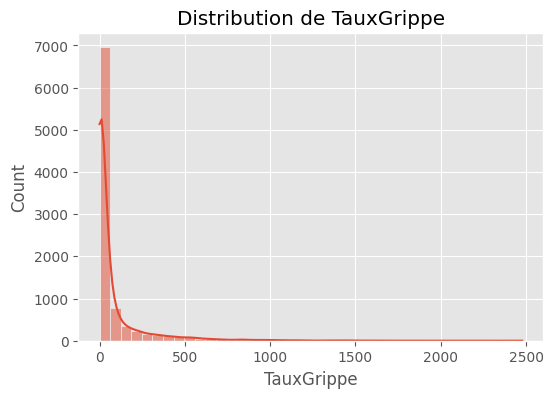

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df_train['TauxGrippe'], bins=40, kde=True)
plt.title('Distribution de TauxGrippe')
plt.show()

La variable cible est asymétrique à droite, avec beaucoup de faibles taux de grippe. Ce comportement est normal en épidémiologie et ne correspond pas à des valeurs aberrantes.

La majorité des observations se situent entre 0 et 500, ce qui indique une faible activité grippale la plupart du temps.

Les valeurs élevées, plus rares, correspondent à des périodes d’épidémie. Elles sont donc normales et ne seront pas traitées comme des outliers. Aucune transformation n’est appliquée, car des modèles comme Random Forest et XGBoost gèrent bien ce type d’asymétrie.

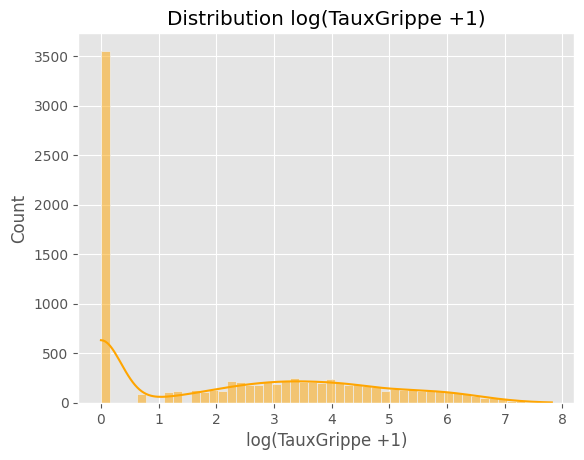

In [16]:
# Log-transform pour mieux voir les gros pics
plt.figure()
sns.histplot(np.log1p(df_train['TauxGrippe']), bins=50, kde=True, color='orange')
plt.title("Distribution log(TauxGrippe +1)")
plt.xlabel("log(TauxGrippe +1)")
plt.show()

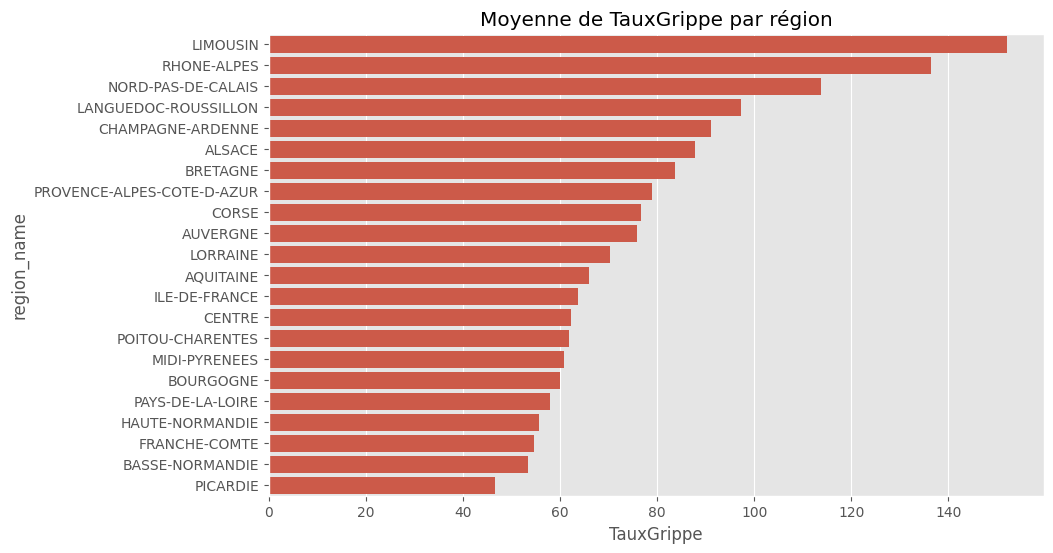

In [17]:
df_region = (
    df_train
    .groupby('region_name')['TauxGrippe']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_region,
    x='TauxGrippe',
    y='region_name'
)
plt.title('Moyenne de TauxGrippe par région')
plt.show()

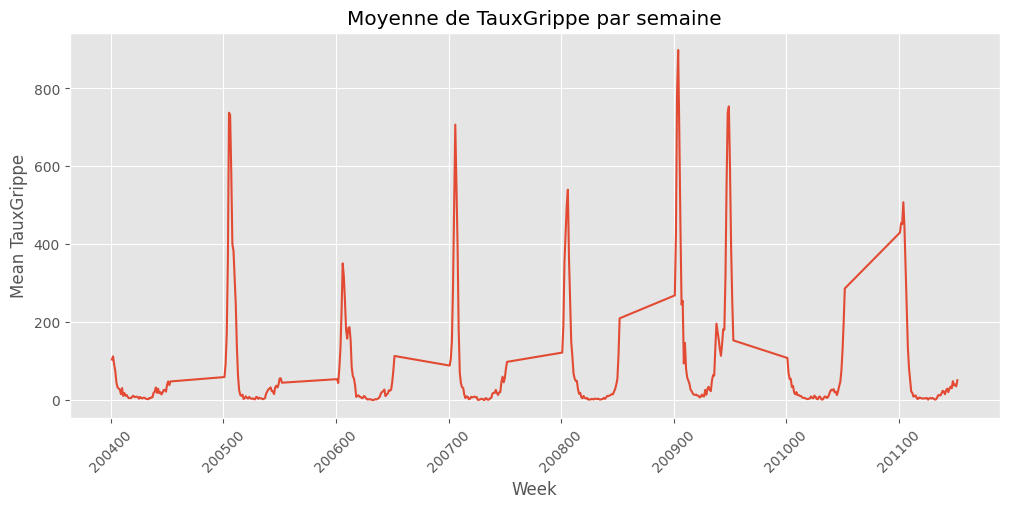

In [18]:
df_week = (
    df_train
    .groupby('week')['TauxGrippe']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 5))
plt.plot(df_week['week'], df_week['TauxGrippe'])
plt.title('Moyenne de TauxGrippe par semaine')
plt.xlabel('Week')
plt.ylabel('Mean TauxGrippe')
plt.xticks(rotation=45)
plt.show()

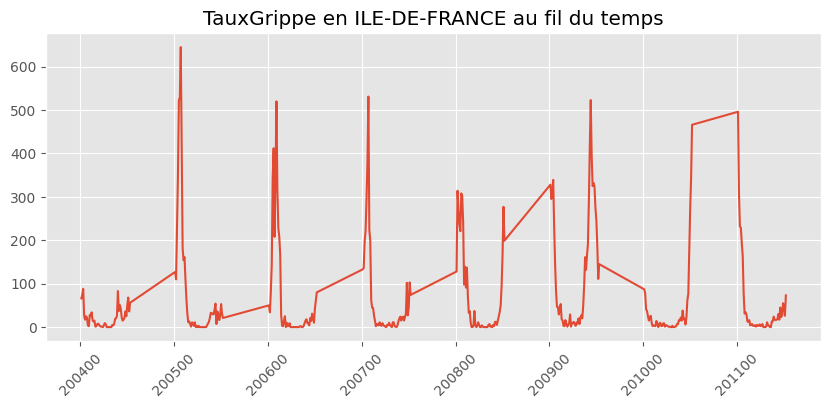

In [19]:
# TauxGrippe par région spécifique au fil du temps
df_one_region = df_train[df_train['region_name'] == 'ILE-DE-FRANCE']

plt.figure(figsize=(10,4))
plt.plot(df_one_region['week'], df_one_region['TauxGrippe'])
plt.title('TauxGrippe en ILE-DE-FRANCE au fil du temps')
plt.xticks(rotation=45)
plt.show()

## Outliers

In [20]:
# Identification top 1% outliers dans TauxGrippe
outliers = df_train[df_train['TauxGrippe'] > df_train['TauxGrippe'].quantile(0.99)]

print("Top 1% of values :", outliers[['region_name','week','TauxGrippe']])

Top 1% of values :              region_name    week  TauxGrippe
1064               CORSE  201104        1303
1068            LIMOUSIN  201104         980
1086               CORSE  201103         949
1115  NORD-PAS-DE-CALAIS  201102        1555
1137  NORD-PAS-DE-CALAIS  201101        1573
...                  ...     ...         ...
7933            LORRAINE  200505         936
7935  NORD-PAS-DE-CALAIS  200505        1656
7936    PAYS-DE-LA-LOIRE  200505        1689
7941         RHONE-ALPES  200505        1855
7963         RHONE-ALPES  200504         955

[92 rows x 3 columns]


## Extraction des semaines & des années

In [27]:
# Data Transformation : extraire year et week_num de la colonne week 
df_train['week'] = df_train['week'].astype(str) 
df_train['year'] = df_train['week'].str[:4].astype(int) 
df_train['week_num'] = df_train['week'].str[4:].astype(int)

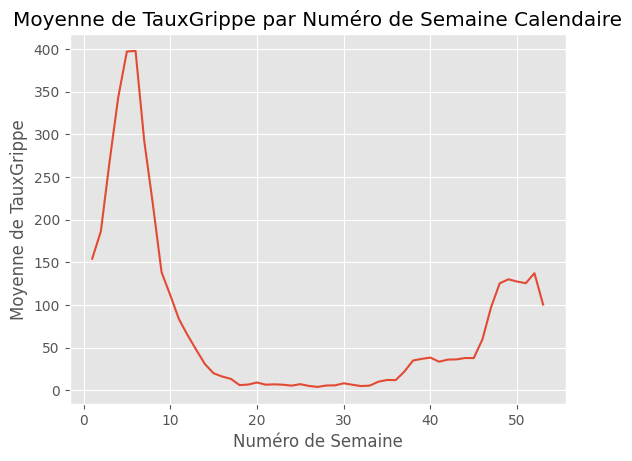

In [28]:
# Visualisation de la tendance hebdomadaire moyenne
weekly_mean = df_train.groupby('week_num')['TauxGrippe'].mean()
plt.figure()
weekly_mean.plot()
plt.title('Moyenne de TauxGrippe par Numéro de Semaine Calendaire')
plt.xlabel('Numéro de Semaine')
plt.ylabel('Moyenne de TauxGrippe')
plt.show()

Des pics saisonniers apparaissent au début et à la fin de l’année (environ les semaines 48–52 et 1–12), correspondant à la période hivernale.
Au milieu de l’année (printemps et été), l’activité grippale est très faible, avec un creux marqué et des valeurs proches de zéro.

Ces schémas saisonniers sont très informatifs pour le modèle, car ils mettent en évidence une forte saisonnalité dans la dynamique de la grippe.

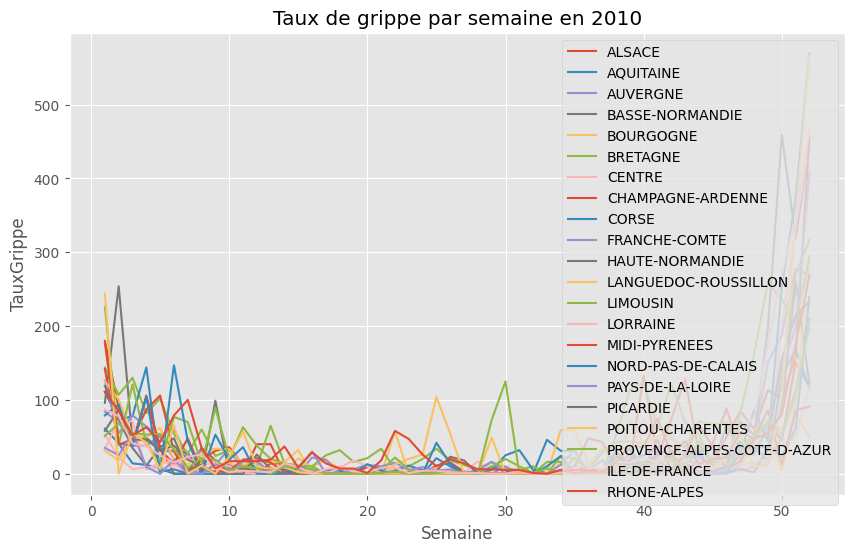

In [24]:
# TauxGrippe par région pour l'année 2010
year_data = df_train[df_train['week'].astype(str).str[:4] == '2010']
year_data['week_num'] = year_data['week'].astype(str).str[4:].astype(int)

plt.figure(figsize=(10,6))
for region in year_data['region_name'].unique():
    subset = year_data[year_data['region_name'] == region]
    plt.plot(subset['week_num'], subset['TauxGrippe'], label=region)
plt.xlabel("Semaine")
plt.ylabel("TauxGrippe")
plt.title("Taux de grippe par semaine en 2010")
plt.legend()
plt.show()

TauxGrippe moyen par région :
 region_name
LIMOUSIN                      152.055024
RHONE-ALPES                   136.337321
NORD-PAS-DE-CALAIS            113.681818
LANGUEDOC-ROUSSILLON           97.255981
CHAMPAGNE-ARDENNE              91.021531
ALSACE                         87.827751
BRETAGNE                       83.779904
PROVENCE-ALPES-COTE-D-AZUR     79.021531
CORSE                          76.648325
AUVERGNE                       75.923445
LORRAINE                       70.322967
AQUITAINE                      65.894737
ILE-DE-FRANCE                  63.598086
CENTRE                         62.330144
POITOU-CHARENTES               61.822967
MIDI-PYRENEES                  60.715311
BOURGOGNE                      59.921053
PAYS-DE-LA-LOIRE               57.834928
HAUTE-NORMANDIE                55.595694
FRANCHE-COMTE                  54.653110
BASSE-NORMANDIE                53.322967
PICARDIE                       46.636364
Name: TauxGrippe, dtype: float64


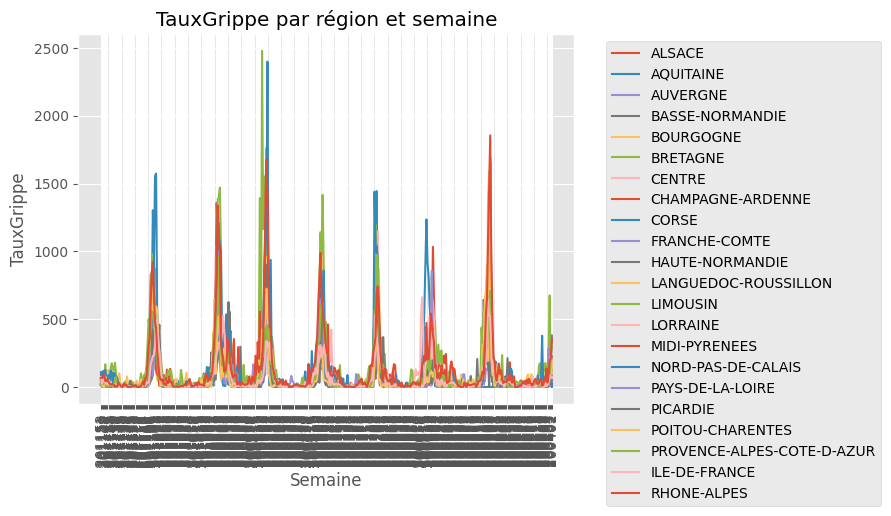

In [25]:
# TauxGrippe moyen par région et tendances
region_mean = df_train.groupby('region_name')['TauxGrippe'].mean().sort_values(ascending=False)
print("TauxGrippe moyen par région :\n", region_mean)

plt.figure()
for region in df_train['region_name'].unique():
    subset = df_train[df_train['region_name'] == region]
    plt.plot(subset['week'], subset['TauxGrippe'], label=region)
plt.xticks(rotation=90)
plt.title("TauxGrippe par région et semaine")
plt.xlabel("Semaine")
plt.ylabel("TauxGrippe")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Le taux de grippe présente des pics marqués en hiver pour l’ensemble des régions, confirmant une forte saisonnalité. Les niveaux restent faibles le reste de l’année, avec des variations d’intensité entre régions lors des épisodes épidémiques.

LIMOUSIN et RHONE-ALPES sont des régions plus montagneuses/froides : la grippe se propage plus facilement en hiver;

PICARDIE, Basse-Normandie, etc. : moins de densité de population.

Globalement, les dynamiques régionales sont cohérentes et suivent un schéma temporel similaire.

In [26]:
df_train['year'].min(), df_train['year'].max()

(np.int64(2004), np.int64(2011))

Cela signifie que notre jeu d’entraînement couvre la période de 2004 à 2011. Il n’y a donc pas de besoin particulier d’intégrer des données postérieures à 2011 (à partir de 2012).

## Conclusion 
– Aucune valeur manquante
– 418 semaines et 22 régions
– Saisonnalité claire avec des pics en hiver, ce qui est cohérent
– Distribution logique, avec une activité grippale plus élevée durant la période hivernale

Globalement, les données sont cohérentes d’un point de vue global et environnemental.